# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jonathan Ardi Putranto
- **Email:** jonathan.ardiputranto@gmail.com
- **ID Dicoding:** ardidiot184

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : In which part of the day bike sharing is at the highest?
- Pertanyaan 2 : In which weather situation bike rentals are at its peak?
- Pertanyaan 3 : How does humidity affect the number of bike rentals?

## Import Semua Packages/Library yang Digunakan

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [119]:
#Initializing the daily bike sharing report and visualizing the first five rows of the data
day_df = pd.read_csv("https://raw.githubusercontent.com/mutantjoe/Bike-Sharing/main/Data/day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [120]:
#Intiaizing the hourly bike sharing report and visualizing the first five rows of the data
hour_df = pd.read_csv("https://raw.githubusercontent.com/mutantjoe/Bike-Sharing/main/Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Assessing the **daily bike sharing** data

In [121]:
#Visualizing the information about daiiy bike sharing data, including details on its structure, data types, and memory usage.
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


There is a data mistype in the dteday column, which ought to be expressed as a datetime data type.

In [122]:
#Describing the descriptive statistics of the daily bike sharing data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


The visualization above implies that the data contains no statistical anomalies

In [123]:
#This code calculates and displays the sum of missing values for each column in the daily bike sharing data
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The results below shows that the data contains no missing value

In [124]:
#This code calculates and displays the sum of duplicated values for each column in the data
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [125]:
print("The amount of duplicated data: ", day_df.duplicated().sum())

The amount of duplicated data:  0


The calculations above suggests that there is no duplicated data

Assessing the **hourly bike sharing** data

In [126]:
#Visualizing the information about hourly bike sharing data, including details on its structure, data types, and memory usage.
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


The data flaw echoes that of the daily bike sharing data, with the dteday expressed as an object data type

In [127]:
#Describing the descriptive statistics of the hourly bike sharing data
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The visualization above implies that the data contains no statistical anomalies

In [128]:
#This code calculates and displays the sum of duplicated values for each column in the data
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The results suggest that the data contains no missing value

In [129]:
#This code calculates and displays the sum of duplicated values for each column in the data
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The results suggests that the data contains no duplicated data

### Cleaning Data

Renaming the data variables to ensure more comfortable visualization and ease in interpretation

In [130]:
#Renaming the daily bike sharing data
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'months',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'air_temperature',
    'hum': 'humidity',
    'cnt': 'counts'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,months,holiday,weekday,workingday,weather_situation,temperature,air_temperature,humidity,windspeed,casual,registered,counts
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [131]:
#Renaming the hourly bike sharing data
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'months',
    'hr': 'hours',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'air_temperature',
    'hum': 'humidity',
    'cnt': 'counts'
}, inplace=True)

hour_df.head()

,instant,dateday,season,year,months,hours,holiday,weekday,workingday,weather_situation,temperature,air_temperature,humidity,windspeed,casual,registered,counts
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Turning certain values in certain data columns into explanations

In [132]:
#Turning numerical values in the daily bike sharing report into explanations

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['months'] = day_df['months'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})
day_df['workingday'] = day_df['workingday'].map({
    0: 'Off-Day', 1: 'Working Day'
})
day_df['weather_situation'] = day_df['weather_situation'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})



We'll notice that the data express a missing value because we haven't transform it into a categorical data

In [133]:
#Turning numerical values in the hourly bike sharing report into explanations

hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['months'] = hour_df['months'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})
hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Off-Day', 1: 'Working Day'
})
hour_df['weather_situation'] = hour_df['weather_situation'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})



Same problems occurs in the hourly bike sharing report data

In [134]:
#Transforming dateday data type to datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

#Transforming certain data types to categorical datatype
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['months'] = day_df.months.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_situation'] = day_df.weather_situation.astype('category')

day_df.head()

,instant,dateday,season,year,months,holiday,weekday,workingday,weather_situation,temperature,air_temperature,humidity,windspeed,casual,registered,counts
0,1,2011-01-01,Spring,0,January,0,Saturday,Off-Day,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,January,0,Sunday,Off-Day,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,January,0,Monday,Working Day,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,January,0,Tuesday,Working Day,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,January,0,Wednesday,Working Day,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [135]:
#Transforming dateday data type to datetime
hour_df['dateday'] = pd.to_datetime(hour_df.dateday)

#Transforming certain data types to categorical datatype
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['months'] = hour_df.months.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weather_situation'] = hour_df.weather_situation.astype('category')

day_df.head()

,instant,dateday,season,year,months,holiday,weekday,workingday,weather_situation,temperature,air_temperature,humidity,windspeed,casual,registered,counts
0,1,2011-01-01,Spring,0,January,0,Saturday,Off-Day,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,January,0,Sunday,Off-Day,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,January,0,Monday,Working Day,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,January,0,Tuesday,Working Day,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,January,0,Wednesday,Working Day,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore ...

*Question 1. In which part of the day bike sharing is at the highest*

In [136]:
hour_df.groupby('hours')['counts'].sum().reset_index()

,hours,counts
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


The data above showcases the sum number of hourly bike sharings

**Question 2. In which weather situation bike rentals are at its peak **

In [137]:
print(pd.unique(day_df['weather_situation']))

['Misty/Cloudy', 'Clear/Partly Cloudy', 'Light Snow/Rain']
Categories (3, object): ['Clear/Partly Cloudy', 'Light Snow/Rain', 'Misty/Cloudy']


In [138]:
weather_situation_analysis_day = day_df.iloc[:, [8, 13, 14, 15]]
weather_situation_analysis_day.groupby('weather_situation').sum()


,casual,registered,counts
weather_situation,,,
Clear/Partly Cloudy,446346,1811606,2257952
Light Snow/Rain,3895,33974,37869
Misty/Cloudy,169776,827082,996858


The result above showcases the sum number of bike rentals in each weather conditions

*Question 3. How does humidity affect the number of bike rentals*

In [139]:
# Specify the two variables of interest
variable1 = 'humidity'
variable2 = 'counts'

# Calculate the correlation coefficient between the two variables
correlation_coefficient = day_df[variable1].corr(day_df[variable2])

# Display the correlation coefficient
print(f'Correlation coefficient between {variable1} and {variable2}: {correlation_coefficient:.2f}')

Correlation coefficient between humidity and counts: -0.10


The number above highlights the correlation coefficient between humidity and counts

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-140-e7c033860efc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='hours', y='counts', data=hour_counts_df, palette="viridis")


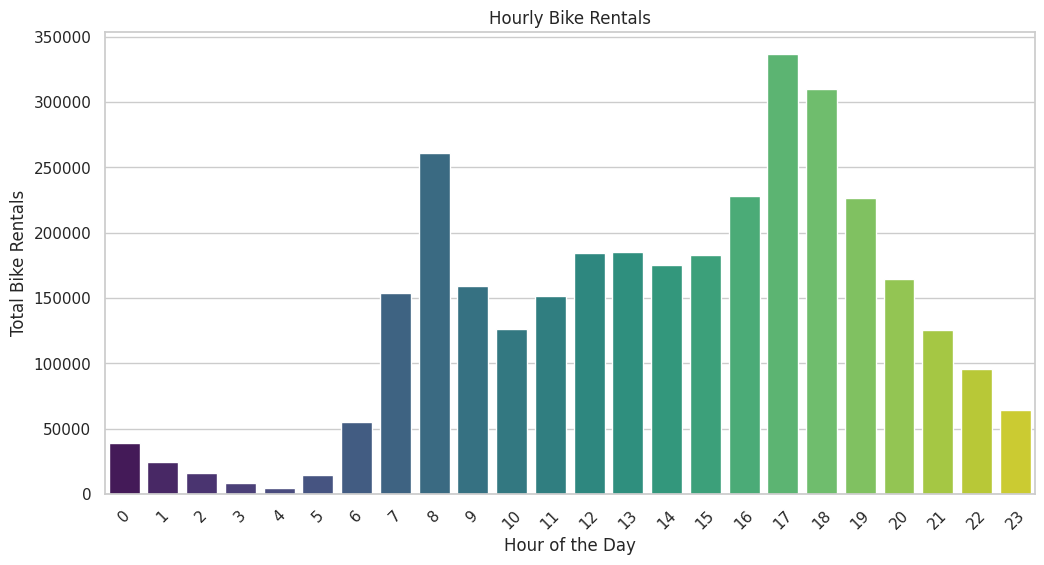

In [140]:
hour_counts_df = hour_df.groupby('hours')['counts'].sum().reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='hours', y='counts', data=hour_counts_df, palette="viridis")

# Customize the plot
plt.title('Hourly Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=45)

# Display the plot
plt.show()

The bar chart above tells us that bike rentals are at its maximum at the 17th hour, or roughly at 5 p.m

### Pertanyaan 2:

['Misty/Cloudy', 'Clear/Partly Cloudy', 'Light Snow/Rain']
Categories (3, object): ['Clear/Partly Cloudy', 'Light Snow/Rain', 'Misty/Cloudy']


<ipython-input-141-ecce7c169c72>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='weather_situation', y='counts', data=weather_situation_sum, palette="viridis")


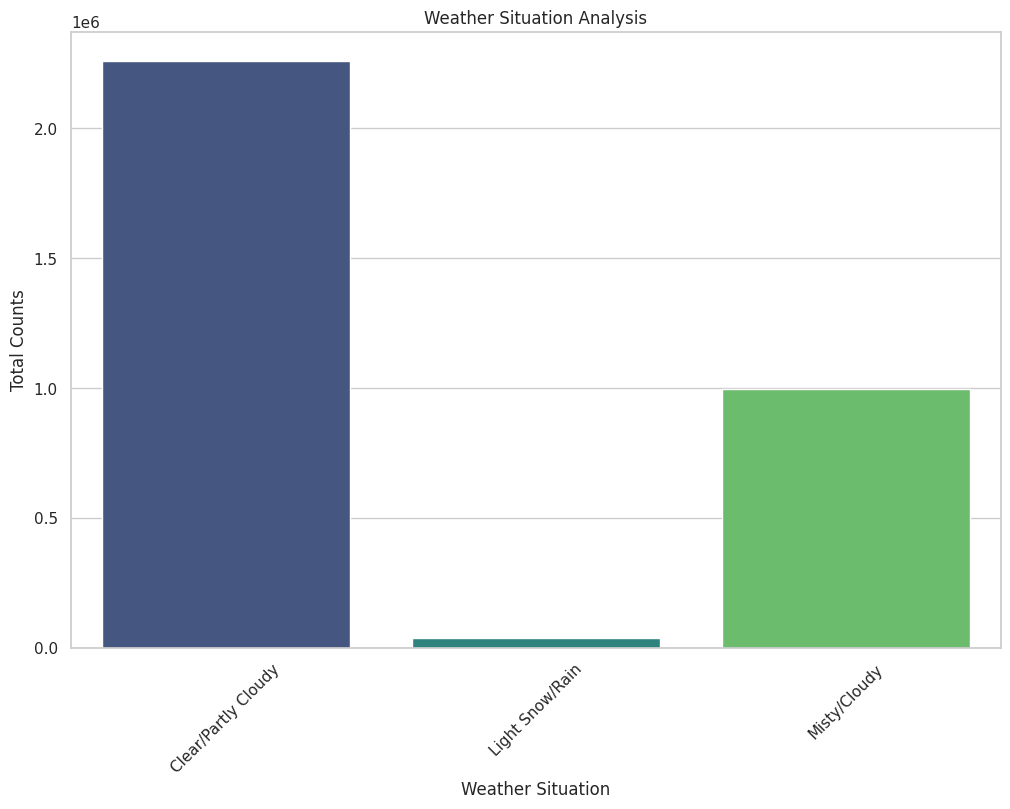

In [141]:
# Print unique values in the 'weather_situation' column
print(pd.unique(day_df['weather_situation']))

# Select columns for analysis
weather_situation_analysis_day = day_df.iloc[:, [8, 13, 14, 15]]

# Group by 'weather_situation' and sum the relevant columns
weather_situation_sum = weather_situation_analysis_day.groupby('weather_situation').sum()

# Reset the index to make 'weather_situation' a regular column
weather_situation_sum = weather_situation_sum.reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for each weather situation
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='weather_situation', y='counts', data=weather_situation_sum, palette="viridis")

# Customize the plot
plt.title('Weather Situation Analysis')
plt.xlabel('Weather Situation')
plt.ylabel('Total Counts')
plt.xticks(rotation=45)

# Display the plot
plt.show()

The bar plot above shows that the weather situation with the highest amount of bike rentals are when the weather is clear and partly cloudy

### Pertanyaan 3.

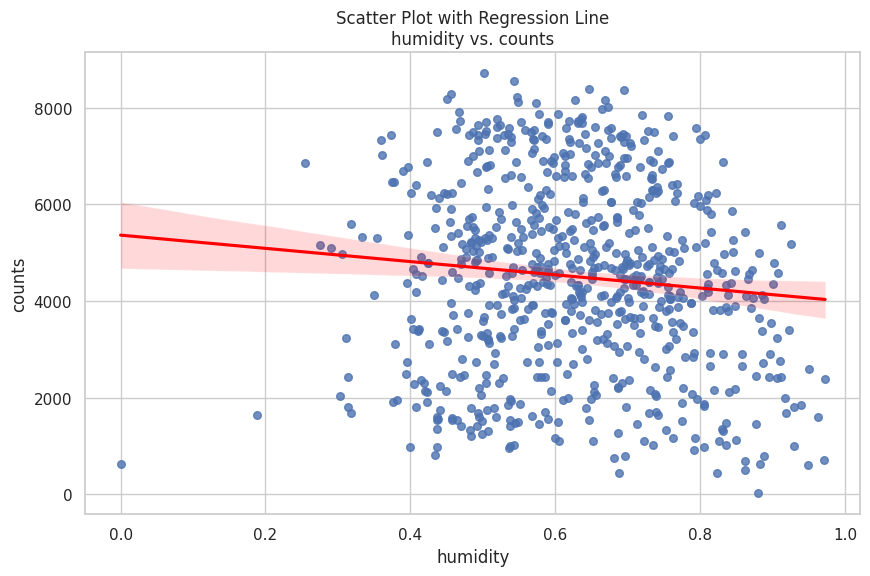

In [142]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
scatter_plot = sns.regplot(x=variable1, y=variable2, data=day_df, scatter_kws={'s': 30}, line_kws={'color': 'red'})

# Customize the plot
plt.title(f'Scatter Plot with Regression Line\n{variable1} vs. {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)

# Display the plot
plt.show()

Although the regression line shows a slight downward trend. The scatter plot shows that humidity hardly affects the number of bike rentals

## Conclusion

**First Question Conclusion** : The results above shows that the hour where bike rentals are at its peak is in the 17th hour, or 5 p.m. The bar chart shows sharp trends around 8 a.m and 5 p.m, suggesting that sharp increments in bike rentals are the result of rush hours which occurs around those times.

**Second Question Conclusion** : The bar chart above shows that bike rentals are its highest when the weather is clear or partly cloudy. This number contrast sharply with the number of bike rentals during rainy or snowy weather, suggesting a collective attitude in the associated risk of cycling in turbulent weathers.

**Third Question Conclusion** : The regression line shows a slight downward trend, but the scatter plot implies that humidity plays very little role in determining the fluctuations in the number of bike rentals. This suggests that humidity is not an important factor in bike rentals, and more attention should be wavered to other more important variables.